# Title of notebook

Brief 1-2 sentence description of notebook.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Imports of all used packages and libraries
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import seaborn as sns


In [3]:
import spikeinterface.extractors as se
import spikeinterface.preprocessing as sp
from spectral_connectivity import Multitaper, Connectivity
import spectral_connectivity

## Inputs & Data

Explanation of each input and where it comes from.

In [4]:
# Inputs and Required data loading
# input varaible names are in all caps snake case
# Whenever an input changes or is used for processing 
# the vairables are all lower in snake case
OUTPUT_DIR = r"./proc/" # where data is saved should always be shown in the inputs
os.makedirs(OUTPUT_DIR, exist_ok=True)

In [5]:
CHANNEL_MAPPING_DF = pd.read_excel("../../data/channel_mapping.xlsx")
TONE_TIMESTAMP_DF = pd.read_excel("../../data/rce_tone_timestamp.xlsx", index_col=0)
channel_map_and_all_trials_df = pd.read_pickle("./proc/full_baseline_and_trial_lfp_traces.pkl")

In [6]:
TIME_HALFBANDWIDTH_PRODUCT = 2
TIME_WINDOW_DURATION = 1
TIME_WINDOW_STEP = 0.5
RESAMPLE_RATE=1000


In [7]:
TRIAL_OR_BASELINE_TO_STYLE = {'baseline': "--", "trial": "-"}

In [8]:
BASELINE_OUTCOME_TO_COLOR = {'lose': "red",
 'omission': "orange",
 'rewarded': "green",
 'win': "blue"}

## Outputs

Describe each output that the notebook creates. 

- Is it a plot or is it data?

- How valuable is the output and why is it valuable or useful?

## Processing

Describe what is done to the data here and how inputs are manipulated to generate outputs. 

In [9]:
# As much code and as many cells as required
# includes EDA and playing with data
# GO HAM!

# Ideally functions are defined here first and then data is processed using the functions

# function names are short and in snake case all lowercase
# a function name should be unique but does not have to describe the function
# doc strings describe functions not function names




In [10]:
channel_map_and_all_trials_df.head()

,time,recording_dir,recording_file,time_stamp_index,video_file,video_frame,video_number,subject_info,competition_closeness,video_name,...,mPFC_baseline_lfp_trace,mPFC_trial_lfp_trace,vHPC_baseline_lfp_trace,vHPC_trial_lfp_trace,BLA_baseline_lfp_trace,BLA_trial_lfp_trace,LH_baseline_lfp_trace,LH_trial_lfp_trace,MD_baseline_lfp_trace,MD_trial_lfp_trace
0,6310663,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,1390826,20221202_134600_omission_and_competition_subje...,1734,1.0,6_1_top_2_base_3,rewarded,20221202_134600_omission_and_competition_subje...,...,"[1.8457601, 1.7363818, 1.6475118, 1.59738, 1.2...","[0.6927297, 0.96389693, 0.7884358, -0.04101689...","[-0.06969439, -0.09568214, -0.05315674, 0.1571...","[1.5864334, 1.5710771, 1.5970649, 1.2155175, 0...","[2.0367627, 2.1163385, 2.1618104, 2.2679114, 2...","[0.3164087, 0.36377528, 0.18757163, -0.5020857...","[3.1382985, 3.2319791, 3.2788196, 3.2881875, 3...","[0.8118982, 1.2209699, 0.87435186, -0.4028264,...","[1.3934726, 1.494771, 1.764077, 1.828315, 1.68...","[-0.9783956, -0.86721426, -0.7288553, -1.40582..."
1,7910662,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,2990825,20221202_134600_omission_and_competition_subje...,3728,1.0,6_1_top_2_base_3,rewarded,20221202_134600_omission_and_competition_subje...,...,"[1.2191132, 1.1348007, 1.2054409, 1.0960625, 0...","[1.0732753, 0.7246318, 0.7633699, 0.3782669, -...","[0.31539667, 0.23152715, 0.29767776, 0.4217101...","[0.03543783, -0.27641505, -0.40044746, -0.6638...","[0.3107247, 0.14209972, -0.05873455, -0.331566...","[0.026525281, -0.04547191, 0.11936376, -0.4092...","[-1.180375, -1.2959143, -1.3771042, -1.458294,...","[0.9492963, 0.46840277, 0.6713773, 0.043717593...","[-0.14577106, -0.16059524, 0.027177656, 0.1680...","[1.6281886, 1.349, 1.4675934, 0.9487473, -0.21..."
2,9710660,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,4790823,20221202_134600_omission_and_competition_subje...,5972,1.0,6_1_top_2_base_3,rewarded,20221202_134600_omission_and_competition_subje...,...,"[-1.2669662, -1.2965895, -1.2532939, -0.986684...","[0.28711826, 0.84996116, 1.0960625, 0.8226166,...","[-1.2556804, -1.2580429, -1.3312811, -1.118654...","[0.060244307, 0.4748669, 0.7654571, 0.6591436,...","[-1.9912907, -1.9041362, -1.9325562, -1.542255...","[0.69344664, 1.4001559, 1.7582471, 1.4304705, ...","[-0.19985186, -0.074944444, -0.18423842, -0.13...","[-0.59643286, 0.27167362, 0.6901134, 0.4371759...","[-0.32119048, -0.52872896, -0.96851283, -0.753...","[0.096357144, 0.88450915, 1.2131118, 0.8943919..."
3,11310658,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,6390821,20221202_134600_omission_and_competition_subje...,7966,1.0,6_1_top_2_base_3,omission,20221202_134600_omission_and_competition_subje...,...,"[-2.0257788, -2.0348935, -1.9323514, -1.754611...","[2.376701, 2.3015034, 1.7796774, 0.9411098, 0....","[0.16655779, 0.42879772, 0.66268736, 0.6934002...","[-1.8427671, -2.303459, -2.6802812, -3.060647,...","[-1.2637402, -1.0382752, -0.82986236, -0.74649...","[2.6771586, 2.3929594, 2.209177, 1.9761335, 1....","[-2.538743, -2.1983705, -1.8673657, -1.7143542...","[2.8447661, 2.3045416, 1.5301157, 0.96490973, ...","[-2.7647088, -2.5546997, -2.3051593, -2.055619...","[2.087738, 1.7418406, 1.1266373, 0.45954946, 0..."
4,12810657,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,7890820,20221202_134600_omission_and_competition_subje...,9836,1.0,6_1_top_2_base_3,rewarded,20221202_134600_omission_and_competition_subje...,...,"[-0.5765152, 0.25749493, 0.6403192, 0.4375135,...","[-0.043295607, 0.73602533, 0.31674156, 0.07747...","[-0.31421542, 0.19727057, 0.4453354, 0.3744597...","[0.21617076, 0.8221576, 0.58236164, 0.43116024...","[-2.1352851, -2.0576038, -2.0822346, -2.140969...","[-0.18188764, 0.113

In [11]:
trace_columns = [col for col in channel_map_and_all_trials_df.columns if "trace" in col]

In [12]:
id_cols = [col for col in channel_map_and_all_trials_df.columns if col not in trace_columns]

In [13]:
trace_columns

['mPFC_baseline_lfp_trace',
 'mPFC_trial_lfp_trace',
 'vHPC_baseline_lfp_trace',
 'vHPC_trial_lfp_trace',
 'BLA_baseline_lfp_trace',
 'BLA_trial_lfp_trace',
 'LH_baseline_lfp_trace',
 'LH_trial_lfp_trace',
 'MD_baseline_lfp_trace',
 'MD_trial_lfp_trace']

In [14]:
channel_map_and_all_trials_df = channel_map_and_all_trials_df.reset_index()

In [15]:
melted_channel_map_and_all_trials_df = channel_map_and_all_trials_df.melt(id_vars=id_cols ,value_vars=trace_columns, var_name='region_and_baseline_or_trial', value_name='lfp_trace')

In [16]:
melted_channel_map_and_all_trials_df["baseline_or_trial"] = melted_channel_map_and_all_trials_df["region_and_baseline_or_trial"].apply(lambda x: x.split("_")[1])

melted_channel_map_and_all_trials_df["brain_region"] = melted_channel_map_and_all_trials_df["region_and_baseline_or_trial"].apply(lambda x: x.split("_")[0])

In [17]:
melted_channel_map_and_all_trials_df.head()

,time,recording_dir,recording_file,time_stamp_index,video_file,video_frame,video_number,subject_info,competition_closeness,video_name,...,Cohort,spike_interface_mPFC,spike_interface_vHPC,spike_interface_BLA,spike_interface_LH,spike_interface_MD,region_and_baseline_or_trial,lfp_trace,baseline_or_trial,brain_region
0,6310663,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,1390826,20221202_134600_omission_and_competition_subje...,1734,1.0,6_1_top_2_base_3,rewarded,20221202_134600_omission_and_competition_subje...,...,1,21,15,14,13,16,mPFC_baseline_lfp_trace,"[1.8457601, 1.7363818, 1.6475118, 1.59738, 1.2...",baseline,mPFC
1,7910662,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,2990825,20221202_134600_omission_and_competition_subje...,3728,1.0,6_1_top_2_base_3,rewarded,20221202_134600_omission_and_competition_subje...,...,1,21,15,14,13,16,mPFC_baseline_lfp_trace,"[1.2191132, 1.1348007, 1.2054409, 1.0960625, 0...",baseline,mPFC
2,9710660,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,4790823,20221202_134600_omission_and_competition_subje...,5972,1.0,6_1_top_2_base_3,rewarded,20221202_134600_omission_and_competition_subje...,...,1,21,15,14,13,16,mPFC_baseline_lfp_trace,"[-1.2669662, -1.2965895, -1.2532939, -0.986684...",baseline,mPFC
3,11310658,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,6390821,20221202_134600_omission_and_competition_subje...,7966,1.0,6_1_top_2_base_3,omission,20221202_134600_omission_and_competition_subje...,...,1,21,15,14,13,16,mPFC_baseline_lfp_trace,"[-2.0257788, -2.0348935, -1.9323514, -1.754611...",baseline,mPFC
4,12810657,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,7890820,20221202_134600_omission_and_competition_subje...,9836,1.0,6_1_top_2_base_3,rewarded,20221202_134600_omission_and_competition_subje...,...,1,21,15,14,13,16,mPFC_baseline_lfp_trace,"[-0.5765152, 0.25749493, 0.6403192, 0.4375135,...",baseline,mPFC


# Calculating power

In [18]:
melted_channel_map_and_all_trials_df["multitaper"] = melted_channel_map_and_all_trials_df["lfp_trace"].apply(lambda x: Multitaper(time_series=x,                                                                                        sampling_frequency=RESAMPLE_RATE,  time_halfbandwidth_product=TIME_HALFBANDWIDTH_PRODUCT, time_window_duration=TIME_WINDOW_DURATION, time_window_step=TIME_WINDOW_STEP))

In [19]:
melted_channel_map_and_all_trials_df["connectivity"] = melted_channel_map_and_all_trials_df["multitaper"].apply(lambda x: Connectivity.from_multitaper(x))

In [20]:
melted_channel_map_and_all_trials_df["frequencies"] = melted_channel_map_and_all_trials_df["connectivity"].apply(lambda x: x.frequencies)

In [21]:
melted_channel_map_and_all_trials_df["all_segment_power"] = melted_channel_map_and_all_trials_df["connectivity"].apply(lambda x: x.power().squeeze())

In [22]:
melted_channel_map_and_all_trials_df["power"] = melted_channel_map_and_all_trials_df["all_segment_power"].apply(lambda x: np.mean(x, axis=0))

In [23]:
melted_channel_map_and_all_trials_df.head()

,time,recording_dir,recording_file,time_stamp_index,video_file,video_frame,video_number,subject_info,competition_closeness,video_name,...,spike_interface_MD,region_and_baseline_or_trial,lfp_trace,baseline_or_trial,brain_region,multitaper,connectivity,frequencies,all_segment_power,power
0,6310663,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,1390826,20221202_134600_omission_and_competition_subje...,1734,1.0,6_1_top_2_base_3,rewarded,20221202_134600_omission_and_competition_subje...,...,16,mPFC_baseline_lfp_trace,"[1.8457601, 1.7363818, 1.6475118, 1.59738, 1.2...",baseline,mPFC,"Multitaper(sampling_frequency=1000, time_halfb...",<spectral_connectivity.connectivity.Connectivi...,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[[0.058093132714983994, 0.04806485476120548, 0...","[0.034021717049745576, 0.03687142453572489, 0...."
1,7910662,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,2990825,20221202_134600_omission_and_competition_subje...,3728,1.0,6_1_top_2_base_3,rewarded,20221202_134600_omission_and_competition_subje...,...,16,mPFC_baseline_lfp_trace,"[1.2191132, 1.1348007, 1.2054409, 1.0960625, 0...",baseline,mPFC,"Multitaper(sampling_frequency=1000, time_halfb...",<spectral_connectivity.connectivity.Connectivi...,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[[0.0070372605787462645, 0.004959732744949388,...","[0.00602896696224265, 0.009855232764519046, 0...."
2,9710660,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,4790823,20221202_134600_omission_and_competition_subje...,5972,1.0,6_1_top_2_base_3,rewarded,20221202_134600_omission_and_competition_subje...,...,16,mPFC_baseline_lfp_trace,"[-1.2669662, -1.2965895, -1.2532939, -0.986684...",baseline,mPFC,"Multitaper(sampling_frequency=1000, time_halfb...",<spectral_connectivity.connectivity.Connectivi...,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[[0.016704537260831438, 0.014768579732477994, ...","[0.005465224412013417, 0.009706452025233426, 0..."
3,11310658,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,6390821,20221202_134600_omission_and_competition_subje...,7966,1.0,6_1_top_2_base_3,omission,20221202_134600_omission_and_competition_subje...,...,16,mPFC_baseline_lfp_trace,"[-2.0257788, -2.0348935, -1.9323514, -1.754611...",baseline,mPFC,"Multitaper(sampling_frequency=1000, time_halfb...",<spectral_connectivity.connectivity.Connectivi...,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[[0.013826900029422115, 0.024529075437894392, ...","[0.008106387660755743, 0.00914053688422356, 0...."
4,12810657,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,7890820,20221202_134600_omission_and_competition_subje...,9836,1.0,6_1_top_2_base_3,rewarded,20221202_134600_omission_and_competition_subje...,...,16,mPFC_baseline_lfp_trace,"[-0.5765152, 0.25749493, 0.6403192, 0.4375135,...",baseline,mPFC,"Multitaper(sampling_frequency=1000, time_halfb...",<spectral_connectivity.connectivity.Connectivi...,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[[0.0036666102744923592, 0.006506492149336379,...","[0.018221833425776133, 0.021952316021835217, 0..."


In [24]:
melted_channel_map_and_all_trials_df.to_pickle("./proc/rce_power_of_zscored_lfp.pkl")

# Plotting all the power's of each subject together

In [25]:
grouping_column = "current_subject"

In [26]:
grouped_all_trials_df = melted_channel_map_and_all_trials_df.groupby(['brain_region', 'baseline_or_trial', grouping_column]).agg({'power': lambda x: np.vstack(x.tolist())}).reset_index()

In [27]:
grouped_all_trials_df["mean_power"] = grouped_all_trials_df["power"].apply(lambda x: np.nanmean(np.vstack(x), axis=0))

In [28]:
grouped_all_trials_df["std_power"] = grouped_all_trials_df["power"].apply(lambda x: np.nanstd(np.vstack(x), axis=0))

In [29]:
grouped_all_trials_df["n_trials"] = grouped_all_trials_df["power"].apply(lambda x: np.sum(~np.isnan(x), axis=0))

In [30]:
grouped_all_trials_df["sem_power"] = grouped_all_trials_df.apply(lambda x: x["std_power"] / np.sqrt(x["n_trials"]), axis=1)

# Drawing plots all together

In [31]:
color_list = ["red", "blue", "green", "orange"]
list(grouped_all_trials_df["current_subject"].unique())

['1.1', '1.2', '1.4', '6.1']

In [32]:
subj_to_color = {subj: color_list[index] for index, subj in enumerate(list(grouped_all_trials_df["current_subject"].unique()))}

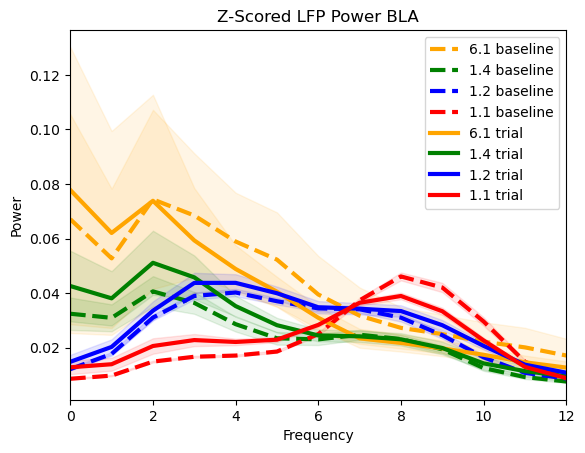

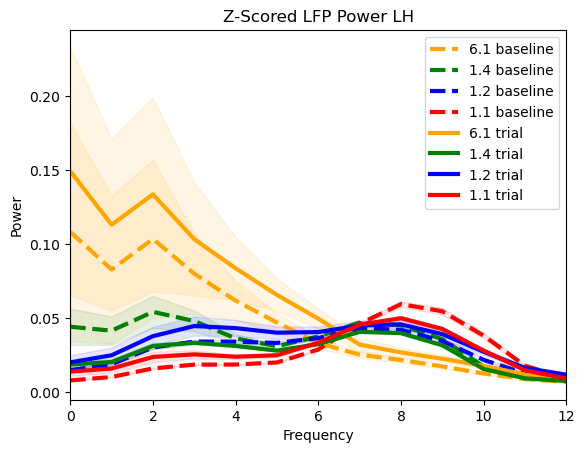

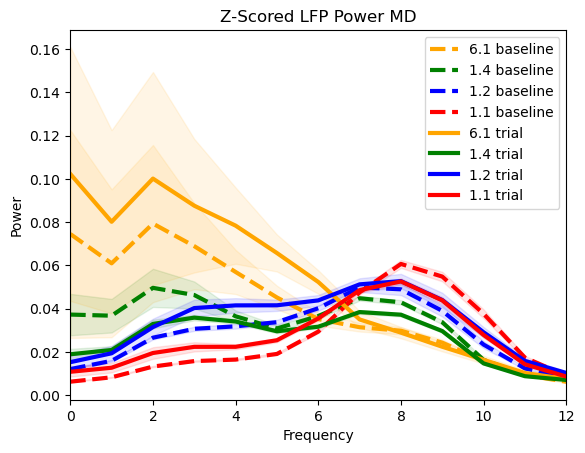

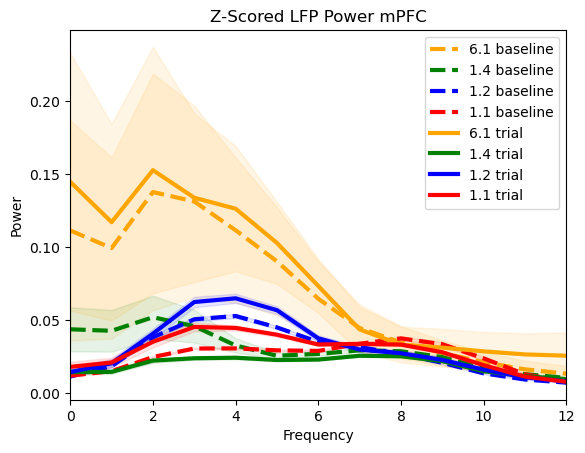

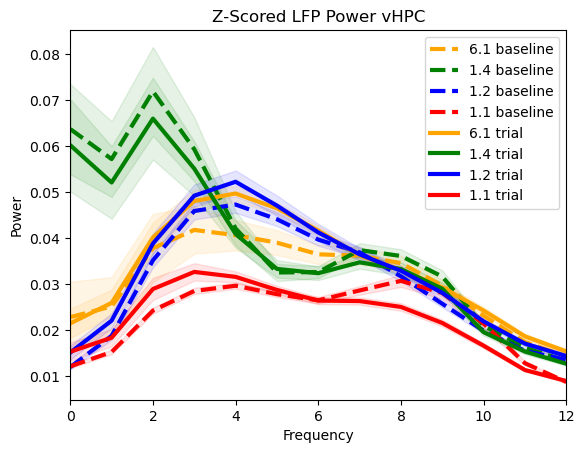

In [33]:
low_freq = 0
high_freq = 12
for region in grouped_all_trials_df["brain_region"].unique():
    region_df = grouped_all_trials_df[grouped_all_trials_df["brain_region"] == region]
    
    fig, ax = plt.subplots()
    plt.title("Z-Scored LFP Power {}".format(region.split("_")[-1]))
    plt.xlabel("Frequency")
    plt.ylabel("Power")
    plt.xlim(low_freq, high_freq) 
    # plt.yscale("log")
    # plt.ylim(0.01, 0.06)

    for baseline_or_trial, outcome in itertools.product(region_df["baseline_or_trial"].unique(), sorted(region_df["current_subject"].unique())[::-1]):
        outcome_df = region_df[(region_df["baseline_or_trial"] == baseline_or_trial) & (region_df["current_subject"] == outcome)]
        for index, row in outcome_df.iterrows():
            try:
                ax = sns.lineplot(x=melted_channel_map_and_all_trials_df["frequencies"].iloc[0][low_freq:high_freq+1], y=row["mean_power"][low_freq:high_freq+1], \
                label="{} {}".format(outcome, baseline_or_trial), \
                linestyle=TRIAL_OR_BASELINE_TO_STYLE[baseline_or_trial], linewidth=3, color=subj_to_color[outcome])
                
                plt.fill_between(melted_channel_map_and_all_trials_df["frequencies"].iloc[0][low_freq:high_freq+1], 
                row["mean_power"][low_freq:high_freq+1] - row["sem_power"][low_freq:high_freq+1], row["mean_power"][low_freq:high_freq+1] + row["sem_power"][low_freq:high_freq+1], \
                alpha=0.1, color=subj_to_color[outcome])
            
            except Exception as e: 
                print(e)
                continue
    plt.legend()
    plt.savefig("./proc/lfp_power/plot_region_line_trialoutcome_baselinetrial/\
    rce_lower_velocity_lfp_power_trialoutcome_baselinetrial_freq_{}_to_{}_region_{}_outcome_{}.png".format(low_freq, high_freq, region.split("_")[-1], grouping_column))
    plt.show()

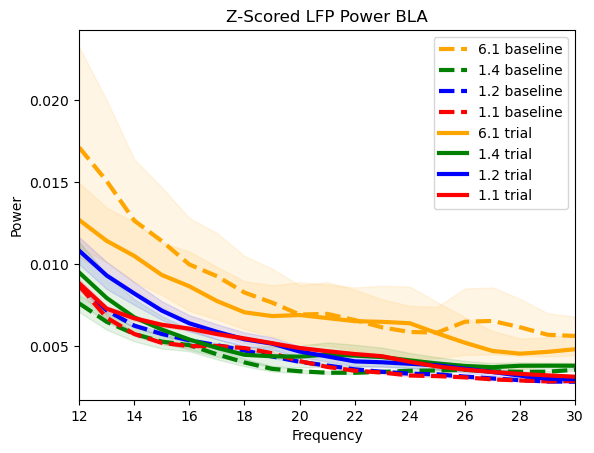

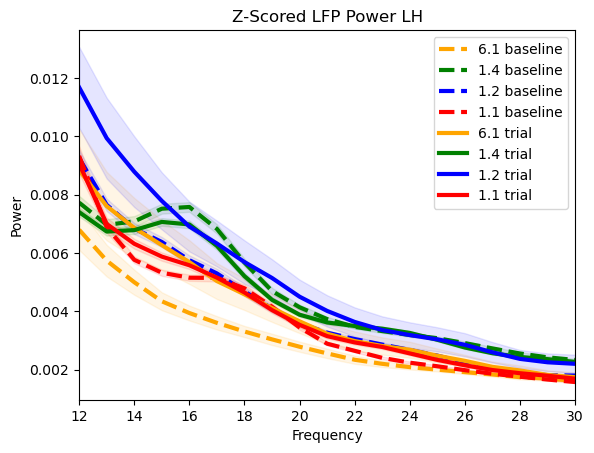

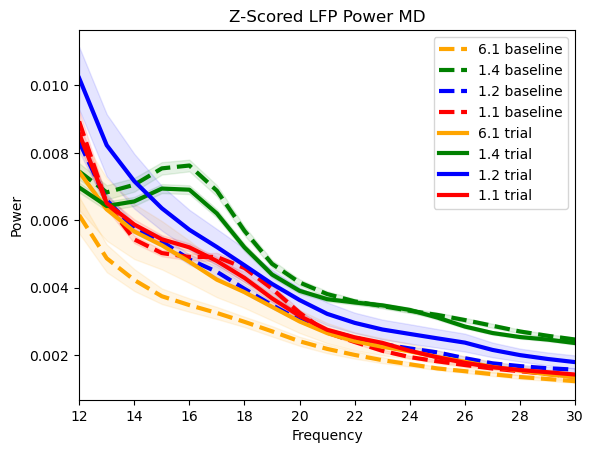

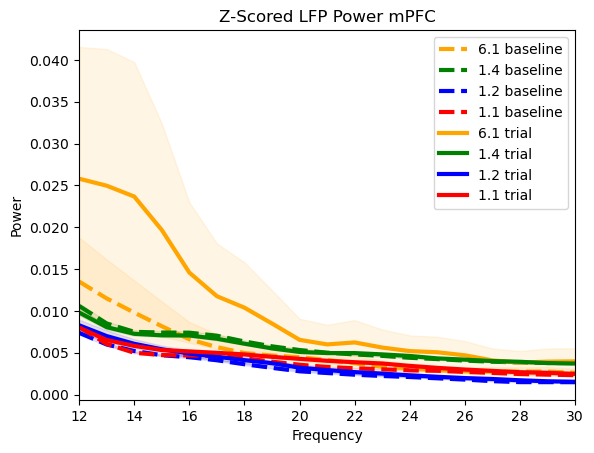

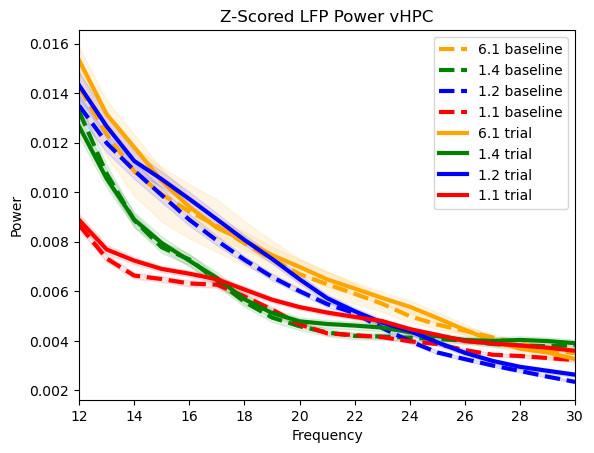

In [34]:
low_freq = 12
high_freq = 30
for region in grouped_all_trials_df["brain_region"].unique():
    region_df = grouped_all_trials_df[grouped_all_trials_df["brain_region"] == region]
    
    fig, ax = plt.subplots()
    plt.title("Z-Scored LFP Power {}".format(region.split("_")[-1]))
    plt.xlabel("Frequency")
    plt.ylabel("Power")
    plt.xlim(low_freq, high_freq) 
    # plt.yscale("log")
    # plt.ylim(0.01, 0.06)

    for baseline_or_trial, outcome in itertools.product(region_df["baseline_or_trial"].unique(), sorted(region_df["current_subject"].unique())[::-1]):
        outcome_df = region_df[(region_df["baseline_or_trial"] == baseline_or_trial) & (region_df["current_subject"] == outcome)]
        for index, row in outcome_df.iterrows():
            try:
                ax = sns.lineplot(x=melted_channel_map_and_all_trials_df["frequencies"].iloc[0][low_freq:high_freq+1], y=row["mean_power"][low_freq:high_freq+1], \
                label="{} {}".format(outcome, baseline_or_trial), \
                linestyle=TRIAL_OR_BASELINE_TO_STYLE[baseline_or_trial], linewidth=3, color=subj_to_color[outcome])
                
                plt.fill_between(melted_channel_map_and_all_trials_df["frequencies"].iloc[0][low_freq:high_freq+1], 
                row["mean_power"][low_freq:high_freq+1] - row["sem_power"][low_freq:high_freq+1], row["mean_power"][low_freq:high_freq+1] + row["sem_power"][low_freq:high_freq+1], \
                alpha=0.1, color=subj_to_color[outcome])
            
            except Exception as e: 
                print(e)
                continue
    plt.legend()
    plt.savefig("./proc/lfp_power/plot_region_line_trialoutcome_baselinetrial/\
    rce_lower_velocity_lfp_power_trialoutcome_baselinetrial_freq_{}_to_{}_region_{}_outcome_{}.png".format(low_freq, high_freq, region.split("_")[-1], grouping_column))
    plt.show()

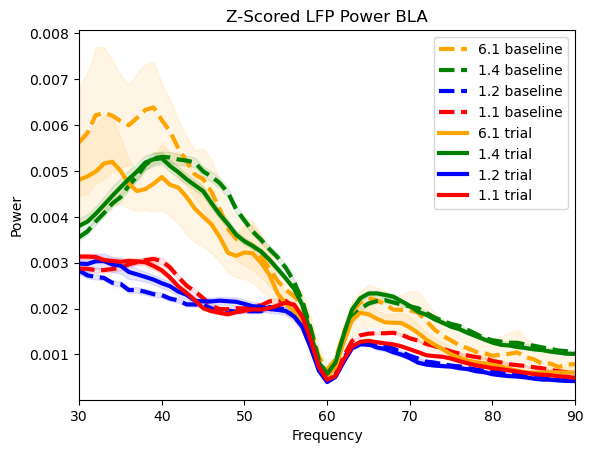

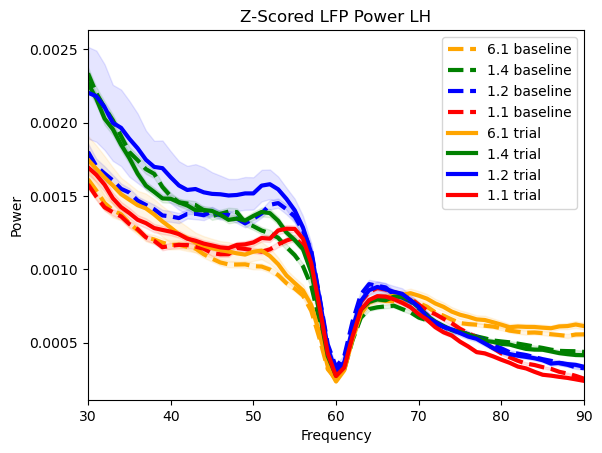

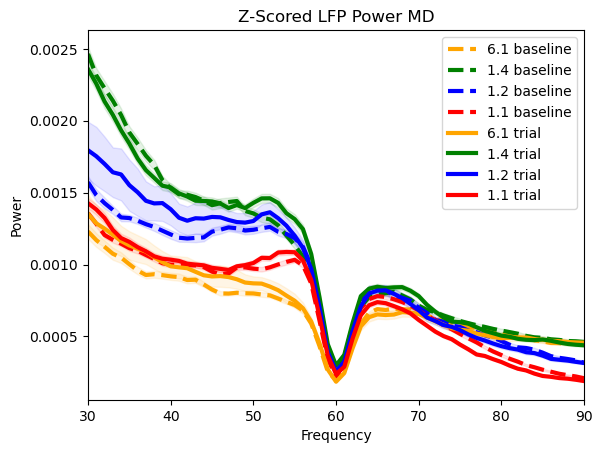

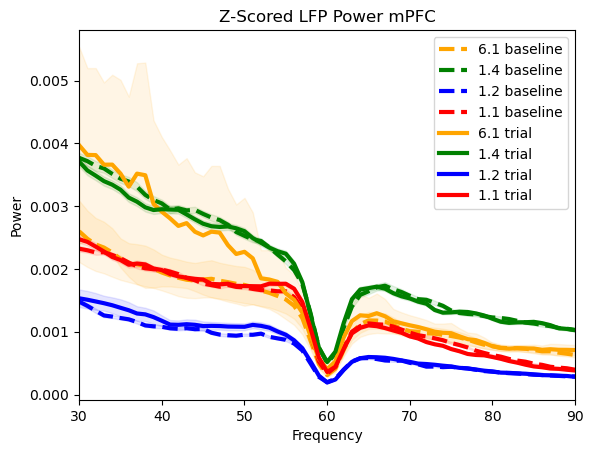

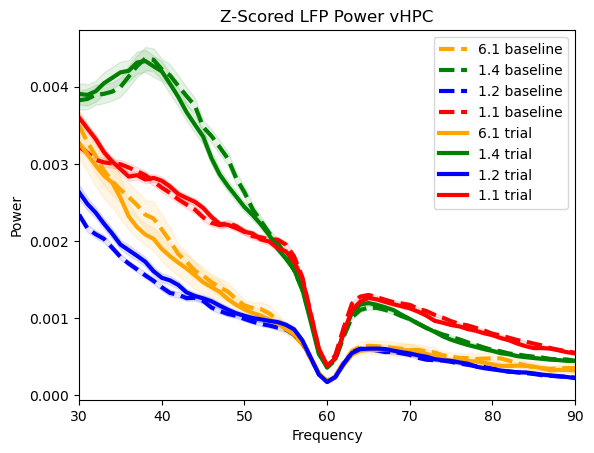

In [35]:
low_freq = 30
high_freq = 90
for region in grouped_all_trials_df["brain_region"].unique():
    region_df = grouped_all_trials_df[grouped_all_trials_df["brain_region"] == region]
    
    fig, ax = plt.subplots()
    plt.title("Z-Scored LFP Power {}".format(region.split("_")[-1]))
    plt.xlabel("Frequency")
    plt.ylabel("Power")
    plt.xlim(low_freq, high_freq) 
    # plt.yscale("log")
    # plt.ylim(0.01, 0.06)

    for baseline_or_trial, outcome in itertools.product(region_df["baseline_or_trial"].unique(), sorted(region_df["current_subject"].unique())[::-1]):
        outcome_df = region_df[(region_df["baseline_or_trial"] == baseline_or_trial) & (region_df["current_subject"] == outcome)]
        for index, row in outcome_df.iterrows():
            try:
                ax = sns.lineplot(x=melted_channel_map_and_all_trials_df["frequencies"].iloc[0][low_freq:high_freq+1], y=row["mean_power"][low_freq:high_freq+1], \
                label="{} {}".format(outcome, baseline_or_trial), \
                linestyle=TRIAL_OR_BASELINE_TO_STYLE[baseline_or_trial], linewidth=3, color=subj_to_color[outcome])
                
                plt.fill_between(melted_channel_map_and_all_trials_df["frequencies"].iloc[0][low_freq:high_freq+1], 
                row["mean_power"][low_freq:high_freq+1] - row["sem_power"][low_freq:high_freq+1], row["mean_power"][low_freq:high_freq+1] + row["sem_power"][low_freq:high_freq+1], \
                alpha=0.1, color=subj_to_color[outcome])
            
            except Exception as e: 
                print(e)
                continue
    plt.legend()
    plt.savefig("./proc/lfp_power/plot_region_line_trialoutcome_baselinetrial/\
    rce_lower_velocity_lfp_power_trialoutcome_baselinetrial_freq_{}_to_{}_region_{}_outcome_{}.png".format(low_freq, high_freq, region.split("_")[-1], grouping_column))
    plt.show()

# Plotting all the power's of each trial outcome together

In [36]:
grouping_column = "trial_outcome"

In [37]:
grouped_all_trials_df = melted_channel_map_and_all_trials_df.groupby(['brain_region', 'baseline_or_trial', grouping_column]).agg({'power': lambda x: np.vstack(x.tolist())}).reset_index()

In [38]:
grouped_all_trials_df["mean_power"] = grouped_all_trials_df["power"].apply(lambda x: np.nanmean(np.vstack(x), axis=0))

In [39]:
grouped_all_trials_df["std_power"] = grouped_all_trials_df["power"].apply(lambda x: np.nanstd(np.vstack(x), axis=0))

In [40]:
grouped_all_trials_df["n_trials"] = grouped_all_trials_df["power"].apply(lambda x: np.sum(~np.isnan(x), axis=0))

In [41]:
grouped_all_trials_df["sem_power"] = grouped_all_trials_df.apply(lambda x: x["std_power"] / np.sqrt(x["n_trials"]), axis=1)

# Drawing plots all together

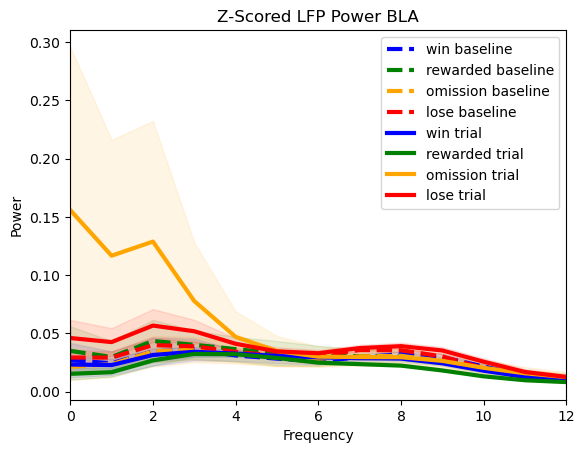

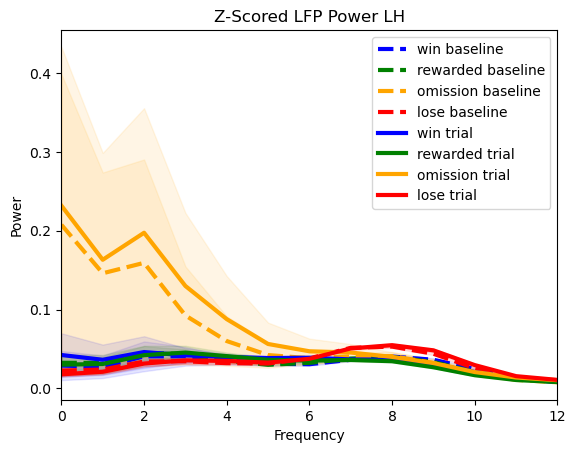

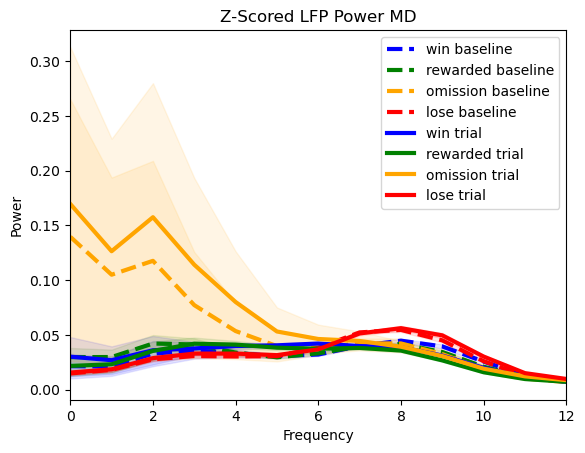

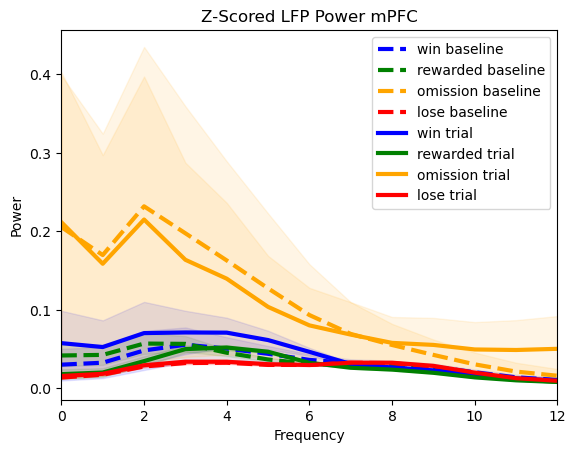

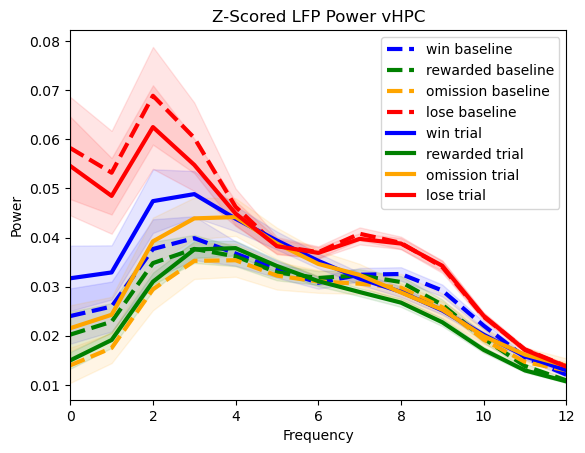

In [42]:
low_freq = 0
high_freq = 12
for region in grouped_all_trials_df["brain_region"].unique():
    region_df = grouped_all_trials_df[grouped_all_trials_df["brain_region"] == region]
    
    fig, ax = plt.subplots()
    plt.title("Z-Scored LFP Power {}".format(region.split("_")[-1]))
    plt.xlabel("Frequency")
    plt.ylabel("Power")
    plt.xlim(low_freq, high_freq) 
    # plt.yscale("log")
    # plt.ylim(0.01, 0.06)

    for baseline_or_trial, outcome in itertools.product(region_df["baseline_or_trial"].unique(), sorted(region_df["trial_outcome"].unique())[::-1]):
        outcome_df = region_df[(region_df["baseline_or_trial"] == baseline_or_trial) & (region_df["trial_outcome"] == outcome)]
        for index, row in outcome_df.iterrows():
            try:
                ax = sns.lineplot(x=melted_channel_map_and_all_trials_df["frequencies"].iloc[0][low_freq:high_freq+1], y=row["mean_power"][low_freq:high_freq+1], \
                label="{} {}".format(outcome, baseline_or_trial), \
                linestyle=TRIAL_OR_BASELINE_TO_STYLE[baseline_or_trial], linewidth=3, color=BASELINE_OUTCOME_TO_COLOR[outcome])
                
                plt.fill_between(melted_channel_map_and_all_trials_df["frequencies"].iloc[0][low_freq:high_freq+1], 
                row["mean_power"][low_freq:high_freq+1] - row["sem_power"][low_freq:high_freq+1], row["mean_power"][low_freq:high_freq+1] + row["sem_power"][low_freq:high_freq+1], \
                alpha=0.1, color=BASELINE_OUTCOME_TO_COLOR[outcome])
            
            except Exception as e: 
                print(e)
                continue
    plt.legend()
    plt.savefig("./proc/lfp_power/plot_region_line_trialoutcome_baselinetrial/\
    rce_lower_velocity_lfp_power_trialoutcome_baselinetrial_freq_{}_to_{}_region_{}_outcome_{}.png".format(low_freq, high_freq, region.split("_")[-1], grouping_column))
    plt.show()

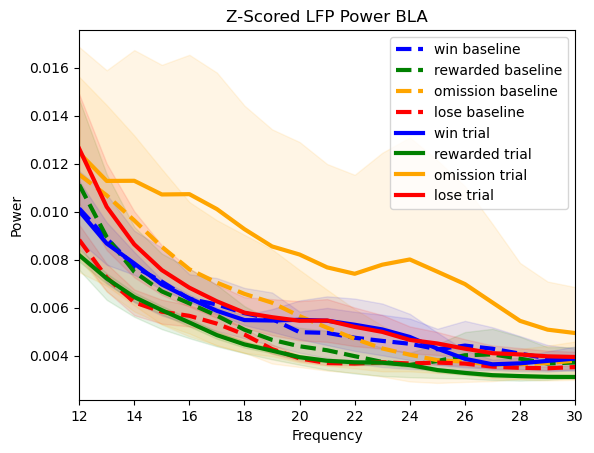

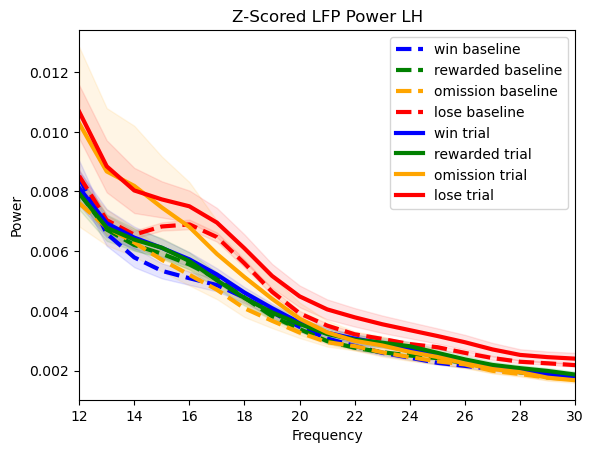

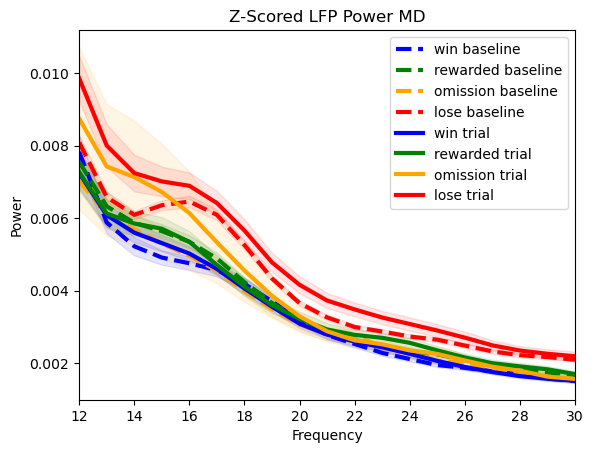

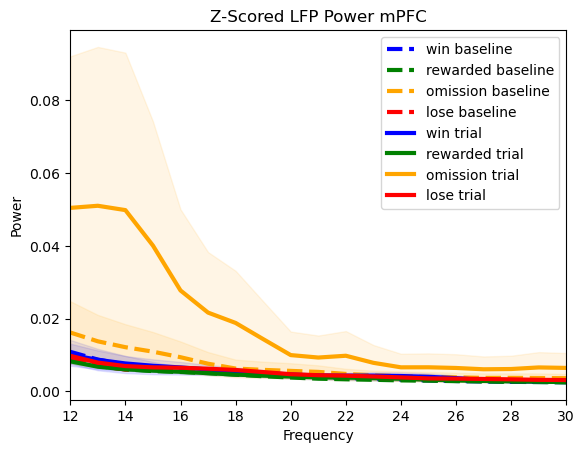

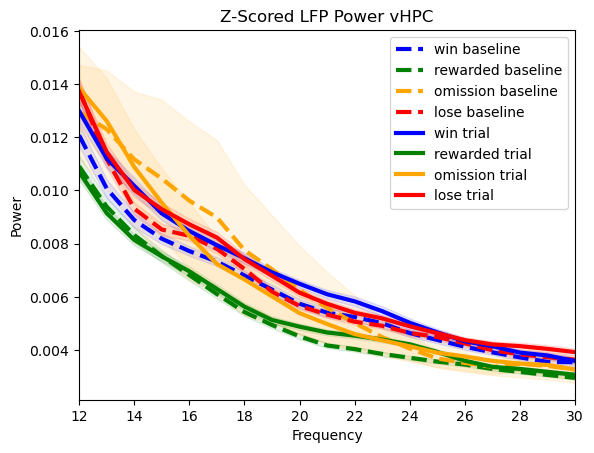

In [43]:
low_freq = 12
high_freq = 30
for region in grouped_all_trials_df["brain_region"].unique():
    region_df = grouped_all_trials_df[grouped_all_trials_df["brain_region"] == region]
    
    fig, ax = plt.subplots()
    plt.title("Z-Scored LFP Power {}".format(region.split("_")[-1]))
    plt.xlabel("Frequency")
    plt.ylabel("Power")
    plt.xlim(low_freq, high_freq) 
    # plt.yscale("log")
    # plt.ylim(0.01, 0.06)

    for baseline_or_trial, outcome in itertools.product(region_df["baseline_or_trial"].unique(), sorted(region_df["trial_outcome"].unique())[::-1]):
        outcome_df = region_df[(region_df["baseline_or_trial"] == baseline_or_trial) & (region_df["trial_outcome"] == outcome)]
        for index, row in outcome_df.iterrows():
            try:
                ax = sns.lineplot(x=melted_channel_map_and_all_trials_df["frequencies"].iloc[0][low_freq:high_freq+1], y=row["mean_power"][low_freq:high_freq+1], \
                label="{} {}".format(outcome, baseline_or_trial), \
                linestyle=TRIAL_OR_BASELINE_TO_STYLE[baseline_or_trial], linewidth=3, color=BASELINE_OUTCOME_TO_COLOR[outcome])
                
                plt.fill_between(melted_channel_map_and_all_trials_df["frequencies"].iloc[0][low_freq:high_freq+1], 
                row["mean_power"][low_freq:high_freq+1] - row["sem_power"][low_freq:high_freq+1], row["mean_power"][low_freq:high_freq+1] + row["sem_power"][low_freq:high_freq+1], \
                alpha=0.1, color=BASELINE_OUTCOME_TO_COLOR[outcome])
            
            except Exception as e: 
                print(e)
                continue
    plt.legend()
    plt.savefig("./proc/lfp_power/plot_region_line_trialoutcome_baselinetrial/\
    rce_lower_velocity_lfp_power_trialoutcome_baselinetrial_freq_{}_to_{}_region_{}_outcome_{}.png".format(low_freq, high_freq, region.split("_")[-1], grouping_column))
    plt.show()

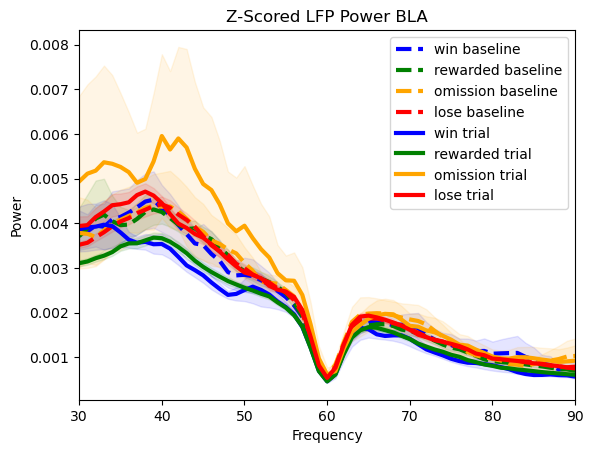

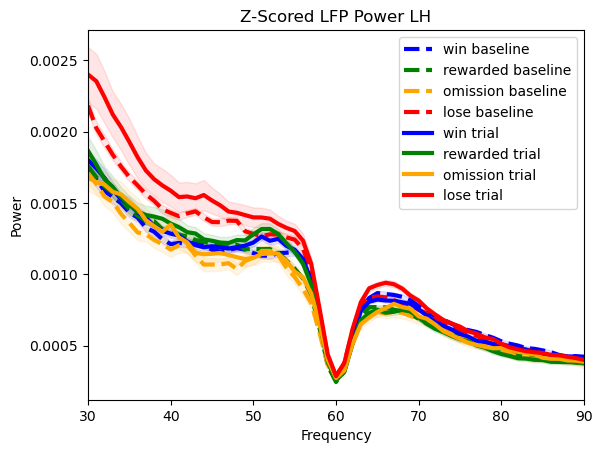

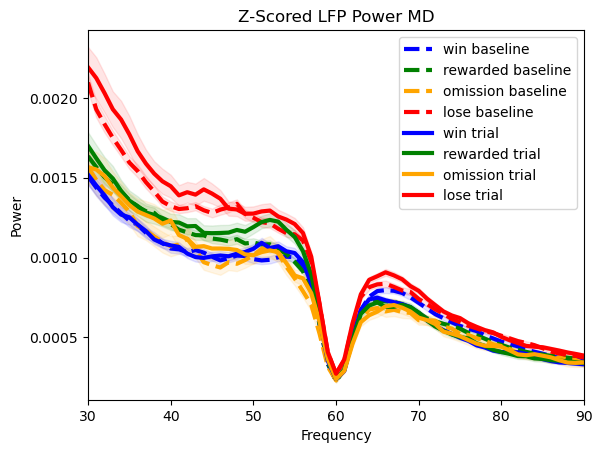

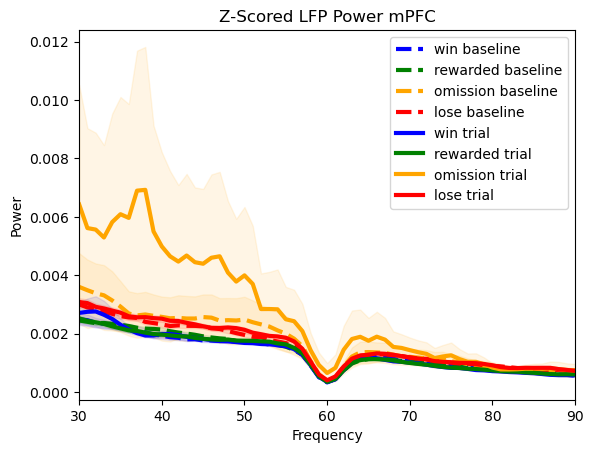

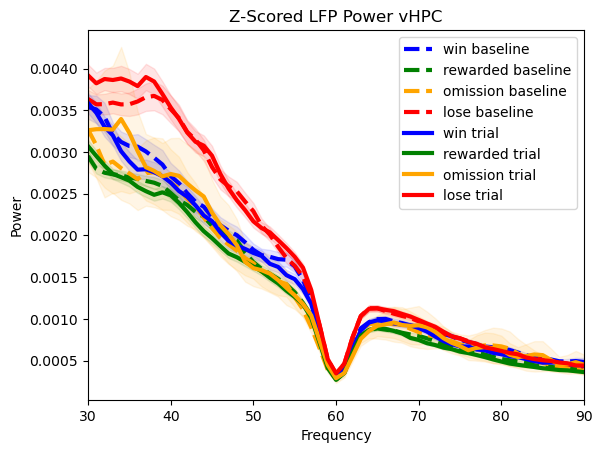

In [44]:
low_freq = 30
high_freq = 90
for region in grouped_all_trials_df["brain_region"].unique():
    region_df = grouped_all_trials_df[grouped_all_trials_df["brain_region"] == region]
    
    fig, ax = plt.subplots()
    plt.title("Z-Scored LFP Power {}".format(region.split("_")[-1]))
    plt.xlabel("Frequency")
    plt.ylabel("Power")
    plt.xlim(low_freq, high_freq) 
    # plt.yscale("log")
    # plt.ylim(0.01, 0.06)

    for baseline_or_trial, outcome in itertools.product(region_df["baseline_or_trial"].unique(), sorted(region_df["trial_outcome"].unique())[::-1]):
        outcome_df = region_df[(region_df["baseline_or_trial"] == baseline_or_trial) & (region_df["trial_outcome"] == outcome)]
        for index, row in outcome_df.iterrows():
            try:
                ax = sns.lineplot(x=melted_channel_map_and_all_trials_df["frequencies"].iloc[0][low_freq:high_freq+1], y=row["mean_power"][low_freq:high_freq+1], \
                label="{} {}".format(outcome, baseline_or_trial), \
                linestyle=TRIAL_OR_BASELINE_TO_STYLE[baseline_or_trial], linewidth=3, color=BASELINE_OUTCOME_TO_COLOR[outcome])
                
                plt.fill_between(melted_channel_map_and_all_trials_df["frequencies"].iloc[0][low_freq:high_freq+1], 
                row["mean_power"][low_freq:high_freq+1] - row["sem_power"][low_freq:high_freq+1], row["mean_power"][low_freq:high_freq+1] + row["sem_power"][low_freq:high_freq+1], \
                alpha=0.1, color=BASELINE_OUTCOME_TO_COLOR[outcome])
            
            except Exception as e: 
                print(e)
                continue
    plt.legend()
    plt.savefig("./proc/lfp_power/plot_region_line_trialoutcome_baselinetrial/\
    rce_lower_velocity_lfp_power_trialoutcome_baselinetrial_freq_{}_to_{}_region_{}_outcome_{}.png".format(low_freq, high_freq, region.split("_")[-1], grouping_column))
    plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a4490980-3f6a-4f44-80eb-ebd789a5b21f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>